In [1]:
import json
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from virus_sim_dashboard import sim

In [2]:
data =json.load(open('private/main_store_data.json'))

env_factory = sim.EnvironmentFactory(data)
n_runs = 30
set_progress = lambda x: None  # no-op for progress updates
results = sim.sim_multiple(env_factory, n_runs, set_progress)

In [3]:
%matplotlib inline

In [4]:
age_groups = results.gim[0].columns.to_list()
age_groups

['0-15', '16-64', '65+']

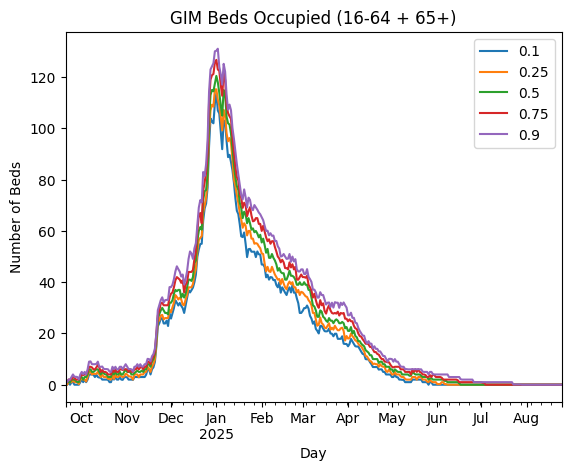

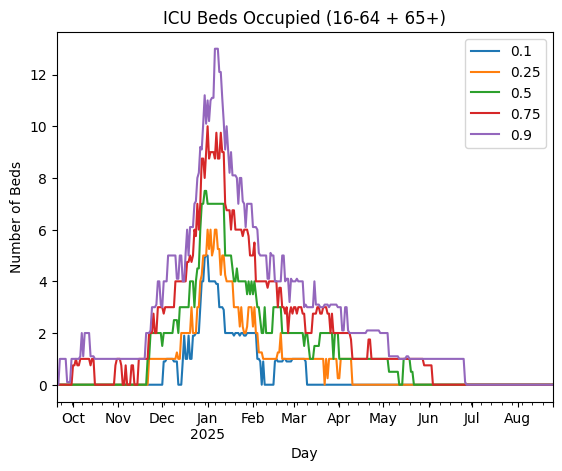

In [5]:
chosen_groupings = ['16-64', '65+']

gim_summary = sim.get_quantiles(results.gim, chosen_groupings)
icu_summary = sim.get_quantiles(results.icu, chosen_groupings)

gim_summary.plot(title="GIM Beds Occupied (16-64 + 65+)", ylabel="Number of Beds", xlabel="Day")
plt.show()

icu_summary.plot(title="ICU Beds Occupied (16-64 + 65+)", ylabel="Number of Beds", xlabel="Day")
plt.show()

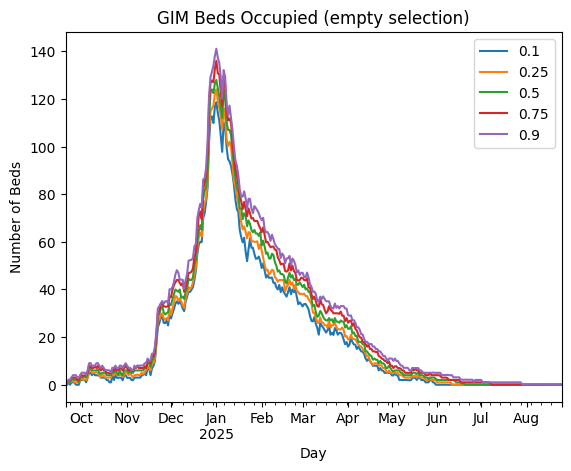

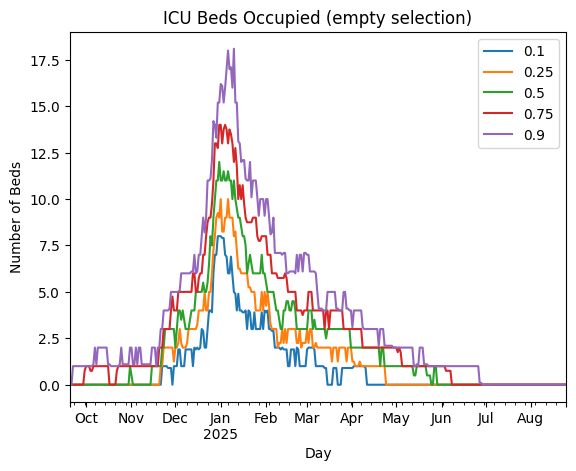

In [6]:
chosen_groupings = ['0-15', '16-64', '65+']

gim_summary = sim.get_quantiles(results.gim, chosen_groupings)
icu_summary = sim.get_quantiles(results.icu, chosen_groupings)

gim_summary.plot(title="GIM Beds Occupied (empty selection)", ylabel="Number of Beds", xlabel="Day")
plt.show()

icu_summary.plot(title="ICU Beds Occupied (empty selection)", ylabel="Number of Beds", xlabel="Day")
plt.show()

In [7]:
list(results.gim[0].columns)

['0-15', '16-64', '65+']

In [45]:
from virus_sim_dashboard.util import DEFAULT_FIGURE_LAYOUT
from plotly import graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=gim_summary.index, y=gim_summary[0.1], line_width=0))
fig.add_trace(go.Scatter(x=gim_summary.index, y=gim_summary[0.9], line_width=0, fill='tonexty', fillcolor="rgba(127,127,255,0.5)"))
fig.add_trace(go.Scatter(x=gim_summary.index, y=gim_summary[0.25], line_width=0))
fig.add_trace(go.Scatter(x=gim_summary.index, y=gim_summary[0.75], line_width=0, fill='tonexty', fillcolor="rgb(127,127,255)"))
fig.add_trace(go.Scatter(x=gim_summary.index, y=gim_summary[0.5], line_width=2, line_color="black"))

fig.show()